### MNIST
MNIST là một bộ dữ liệu tổng hợp 70000 chữ viết tay được tổng hợp và đã được dán nhãn

In [124]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
 0           0       0       0       0  ...         0         0         0         0
 1           0       0       0       0  ...         0         0         0         0
 2           0       0       0       0  ...         0         0         0         0
 3           0       0       0       0  ...         0         0         0         0
 4           0       0       0       0  ...         0         0         0         0
 ...       ...     ...     ...     ...  ...       ...       ...       ...       ...
 69995       0       0       0       0  ...         0         0         0         0
 69996       0       0       0       0  ...         0         0         0         0
 69997       0       0       0       0  ...         0         0         0         0
 69998       0       0       0       0  ...         0         0         0         0
 69999       0       0       0       0  ...         0         0     

In [125]:
X, y = mnist['data'], mnist['target']
X.shape 

(70000, 784)

In [126]:
y.shape

(70000,)

In [127]:
X = X.to_numpy()
y = y.to_numpy()

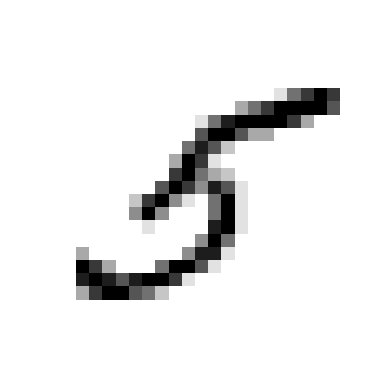

In [128]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[35]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
 interpolation="nearest")
plt.axis("off")
plt.show()


In [129]:
for i in range(400):
    if y[i]=='5':
        print(i)
        
y[0]

0
11
35
47
65
100
132
138
145
173
175
182
191
219
236
239
244
259
266
273
278
284
287
306
316
328
332
335
376
396


'5'

### Tạo test set
Cần tạo test set và bỏ sang 1 bên trước khi tiến hành xử lý và train dữ liệu


In [130]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [131]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Huấn luyện phân loại nhị phân (Binary Classifier)

Đơn giản hóa vấn đề là phân loại số 5 và ko phải số 5

In [132]:
# Tách ra thành target là 5
y_train_5 = (y_train == '5') 
y_test_5 = (y_test == '5')

In [133]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)



SGDClassifier(random_state=42)

In [134]:
sgd_clf.predict([some_digit])

array([ True])

Note: Nó đã phân loại đúng là chữ số đó là số 9 chứ không phải 5

# Đo đạc hiệu suất của mô hình

### Đo đạc tính chính xác sử dụng cross-validation

In [135]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96635, 0.9685 , 0.96385])

Tỉ lệ chính xác trên 95% cho tất cả các fold. Hãy cũng nhìn qua việc phân loại các lớp ko phải là 5 đối với mô hình trên

In [136]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [137]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.90815, 0.91065, 0.91015])

Tỉ lệ là 90%. Nhưng để ý 1 chút thì chỉ có khoảng 10% dữ liệu là chữ số 5 nên nếu mô hình luôn đoán mọi chữ só đều ko phải 5 thì tỉ lệ đúng chắc chắc là trên 90% =)))))

Điều này là một ví dụ rõ ràng cho thấy accuracy ko phải chỉ số chính để đo đạc hiệu suất của mô hình đối với dạng skewed dataset(Khi một class xuất hiện thường xuyên hơn các class còn lại)

### Confusion Matrix
Ý tưởng là đếm số lần mô hình bị nhầm lẫn phân loại class A thành class B.

In [138]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [139]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54068,   511],
       [ 1515,  3906]])

Mỗi hàng biểu diễn actual class
Mõi cột biểu diễn predicted class
Từ kết quả ta thấy có 53718 kết qủa được dự đoán đúng là non-5(true negative)
861 được dự đoán thành 5 (false positive)
1684 kết  quả được dự đoán thành non-5 (False negative)
3737 kết quả dự đoán chinhs xác 5 (True positive)
1 mô hình hoàn hảo sẽ chỉ có True positive và True negative

### Precision and Recall

Mặc dù confusion matrix đã cho khá nhiều thông tin, nhưng có thể sẽ muốn một chỉ số ngắn ngọn hơn: precision(Độ chuẩn xác)
- precision = TP/(TP+FP)

Precision sẽ thường đi với một chỉ số quan trọng khác là recall(Độ nhạy) hoặc true positve rate: Tỉ lệ các mẫu được phân loại đúng 
- recall = TP/(TP+FN)

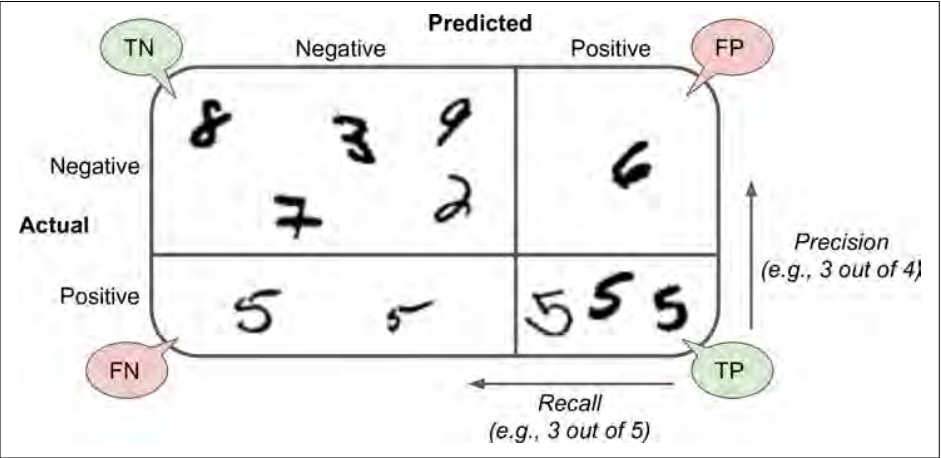

In [140]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) 

np.float64(0.884310618066561)

In [141]:
recall_score(y_train_5, y_train_pred)

np.float64(0.7205312672938572)

Note: thấy có vẻ mô hình cũng chưa ngon lắm, phân loại sai 19% là 5 và nhầm khoảng 32% số 5 thành non-5

Để cho tiện hơn, thường kết hợp 2 chỉ số này thành 1 là F1_score. F1_score chỉ cao khi cả recall và precision đều cao

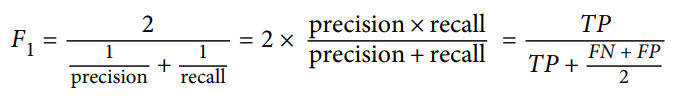

In [142]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)


np.float64(0.7940638341126245)

### Precision and Recall tradeoff

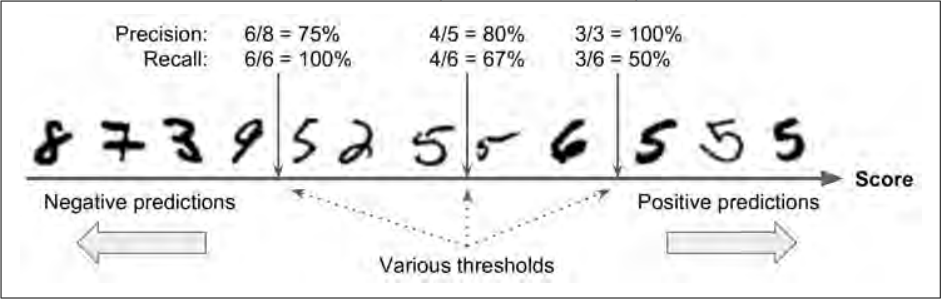

SGDCclassifier đưa ra quyết định phân loại, nó sẽ tính toán hàm quyết định, nếu giá trị lớn hơn ngưỡng(threshold) thì sẽ gán lớp dương, ngược lại sẽ là lớp âm.

In [146]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores


array([4596.76962007])

In [147]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred


array([ True])

In [148]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")


In [149]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


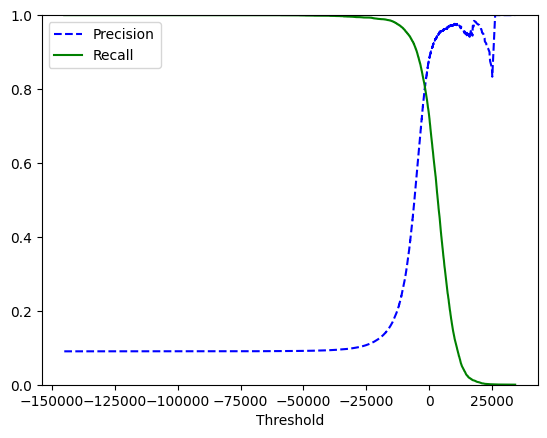

In [150]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Đường cong ROC (Receiver Operating Characteristic) là một công cụ phổ biến khác được sử dụng với các bộ phân loại nhị phân. Nó rất giống với đường cong precision/recall, nhưng thay vì vẽ precision so với recall, đường cong ROC vẽ tỷ lệ true positive (tên khác của recall) so với tỷ lệ false positive. 


In [151]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

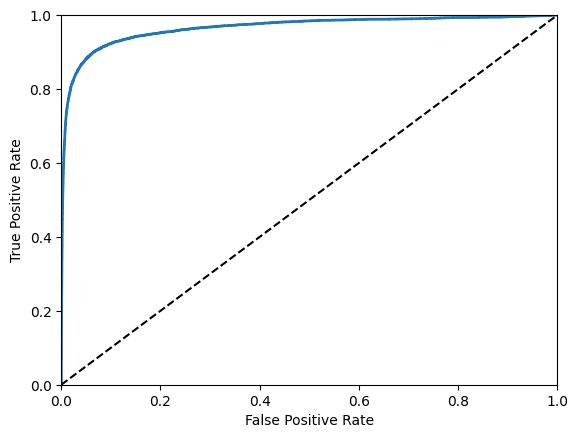

In [152]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()


Note: TPR càng cao thì FPR càng cao. Đường ở giữa thể hiện randome classifier (Rất tệ) Nên tránh xa dường này khi train mô hình.
Một cách khác là đo AUC(Area Under the Curve), mô hình hoàn hảo sẽ có AUC = 1

In [153]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)


np.float64(0.9654600070836532)

Thử train mô hình RandomForestClassifier để so sánh

In [154]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,method="predict_proba")


In [155]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

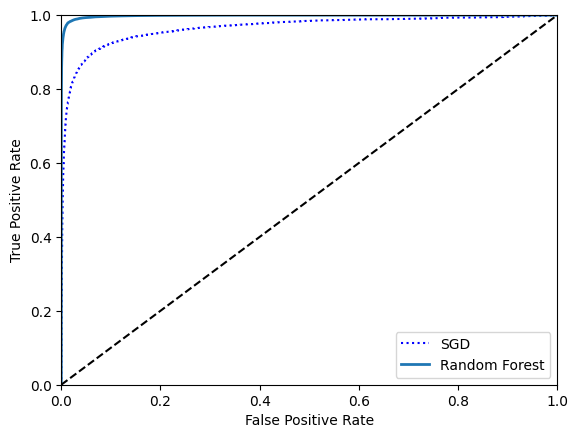

In [158]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()


In [159]:
roc_auc_score(y_train_5, y_scores_forest)

np.float64(0.9984054970062316)

In [160]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

np.float64(0.9903644742354419)

In [161]:
recall_score(y_train_5, y_train_pred_forest)

np.float64(0.872163807415606)

# Multiclass Classification



Một số thuật toán, như Random Forest và Naive Bayes, có thể xử lý trực tiếp phân loại đa lớp, trong khi các thuật toán như SVM và bộ phân loại tuyến tính chỉ hỗ trợ phân loại nhị phân. Để phân loại đa lớp, có hai chiến lược chính:

- One-vs-All (OvA): Huấn luyện một bộ phân loại nhị phân cho từng lớp. Khi phân loại, chọn lớp có điểm số cao nhất. Đây là chiến lược phổ biến cho hầu hết các thuật toán nhị phân.

- One-vs-One (OvO): Huấn luyện một bộ phân loại nhị phân cho mỗi cặp lớp (N×(N-1)/2 bộ phân loại). Phân loại bằng cách chọn lớp thắng nhiều "cuộc đấu" nhất. Phương pháp này phù hợp với thuật toán như SVM, giúp xử lý hiệu quả trên các tập dữ liệu nhỏ.

OvO thường ưu tiên khi thuật toán không mở rộng tốt với dữ liệu lớn, còn OvA thích hợp hơn với hầu hết các thuật toán nhị phân.

Scikit-learn sẽ tự động sử dụng thuật toán OVA

In [ ]:
sgd_clf.fit(X_train, y_train) # y_train, not y_train_5
sgd_clf.predict([some_digit])


array(['5'], dtype='<U1')

In [164]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-19231.54511459,  -8819.6774412 ,  -5701.92930245,
         -2257.77880225,  -7020.72902028,   1280.24996905,
        -16348.4657304 , -16910.70689038,  -5543.51849479,
        -11213.86309008]])

In [165]:
sgd_clf.classes_


array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

Có thể bắt sử dụng OvO

In [166]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array(['5'], dtype=object)

In [167]:
len(ovo_clf.estimators_)


45

In [169]:
# Huấn luyện RandomForestClassifier
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [170]:
forest_clf.predict([some_digit])


array(['5'], dtype=object)

In [171]:
forest_clf.predict_proba([some_digit])


array([[0.01, 0.01, 0.  , 0.03, 0.02, 0.9 , 0.01, 0.01, 0.01, 0.  ]])

In [172]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

c:\Users\dungb\Desktop\AI\machine_learning\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\dungb\Desktop\AI\machine_learning\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\dungb\Desktop\AI\machine_learning\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.8987, 0.9012, 0.9065])

### Error Analysis
Đầu tiên, hãy nhìn vào confusion matrix

In [173]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx


c:\Users\dungb\Desktop\AI\machine_learning\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\dungb\Desktop\AI\machine_learning\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\dungb\Desktop\AI\machine_learning\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[5602,    0,   19,    6,    9,   47,   38,    5,  196,    1],
       [   2, 6422,   40,   24,    3,   43,    4,    8,  185,   11],
       [  27,   28, 5272,   81,   72,   28,   65,   41,  332,   12],
       [  27,   22,  115, 5251,    2,  216,   24,   44,  370,   60],
       [  13,   14,   47,   13, 5252,   10,   34,   22,  294,  143],
       [  29,   16,   36,  157,   48, 4501,   81,   15,  473,   65],
       [  29,   19,   51,    3,   41,   92, 5560,    5,  118,    0],
       [  22,   12,   53,   27,   43,   15,    3, 5724,  159,  207],
       [  17,   66,   41,  103,    3,  124,   33,    6, 5409,   49],
       [  24,   23,   30,   61,  126,   40,    1,  184,  325, 5135]])

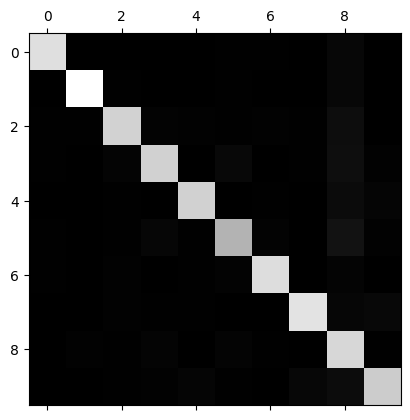

In [174]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()


Trông confusion matrix có vẻ ổn, hầu hết các class đều được phân loại đúng
Thử tính tỉ lệ lỗi của mỗi lớp thay vì số sai số 

In [175]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums


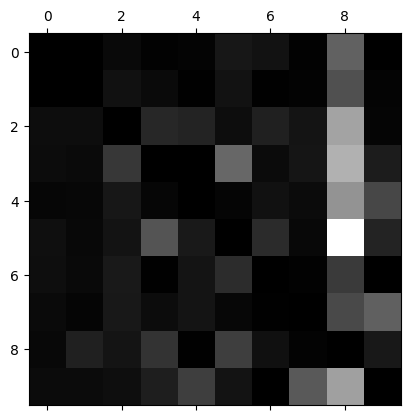

In [176]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()


Các ô trắng ở 8,9 cho thấy rất nhiều số 8,9 thường bị nhận nhầm thành số khác. Ngược lại như hàng 1 khá là tối thì thể hiện rằng mô hinhf thường nhận chính xác số 1.
Từ biểu đồ có thể thấy nên tập trung thêm vào việc phân loại số 8,9

### Multilabel Classification
Nhiều trường hợp thay vì phân loại ra 1 class mà output cần chứa nhiều loại. Như khi nhận diện khuôn mặt trong một ảnh có nhiều người chẳng hạn, kì vọng mô hình sẽ tự nhận diện có những người nào trong ảnh và dán nhãn

In [181]:
# Ví dụ về model có lớn hơn 7 hoặc là số lẻ
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (int(y_train) >= 7)
y_train_odd = (int(y_train) % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

TypeError: only length-1 arrays can be converted to Python scalars

In [ ]:
knn_clf.predict([some_digit])

In [177]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")


NameError: name 'knn_clf' is not defined